In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/ai-developer-productivity-dataset")

#print("Path to dataset files:", path)

c:\Users\user\Downloads\Program_project_py\ML\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
for file in os.listdir(path):
    if file.endswith(".csv"):
        print("Found CSV file:", file)
        # Load the dataset
        PATH = os.path.join(path, file)
        dataset_original = pd.read_csv(PATH)
        
dataset_original.head()

Found CSV file: ai_dev_productivity.csv


,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


# 資料結構

In [4]:
dataset = dataset_original.copy()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
 8   task_success      500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
dataset.isna().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
task_success        0
dtype: int64

# 解析資料分佈與異常

程式錯誤回報-頻率
---

Text(0, 0.5, 'Frequency')

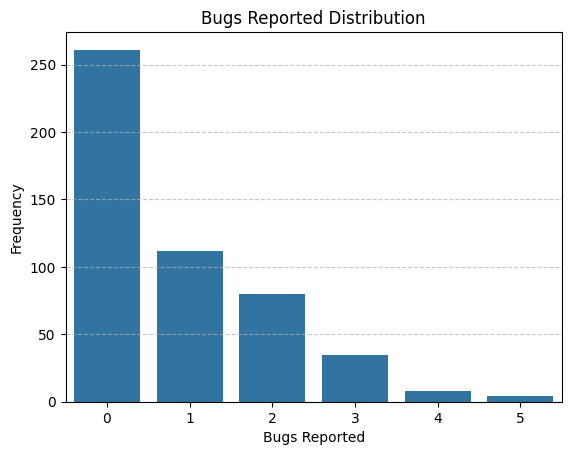

In [7]:
#plt.figure(figsize=(12, 6))
sns.barplot(x=dataset['bugs_reported'].value_counts().index,
            y=dataset['bugs_reported'].value_counts().values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Bugs Reported Distribution")
plt.xlabel("Bugs Reported")
plt.ylabel("Frequency")


結論 : 無特別

咖啡因攝取量 是否會影響 任務成功 
---

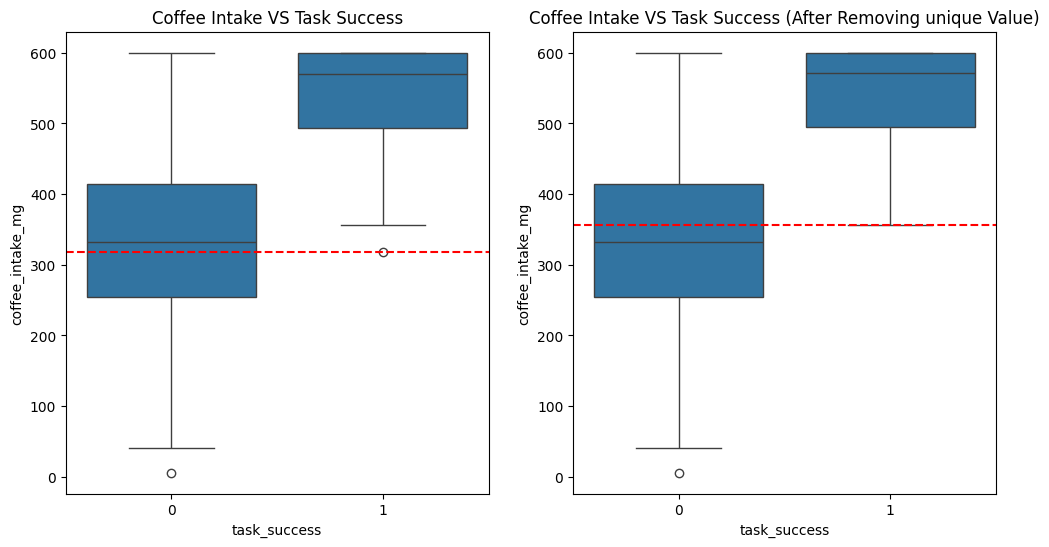

In [8]:
f, axes = plt.subplots(1, 2)
f.set_figwidth(12 )
f.set_figheight(6)
sns.boxplot(x='task_success', y='coffee_intake_mg', data=dataset_original , ax=axes[0])
axes[0].set_title("Coffee Intake VS Task Success")

axes[0].axhline(
            y=dataset_original["coffee_intake_mg"][dataset_original["task_success"] == 1].min(),
            color='r', 
            linestyle='--'
        )

coffee_success = dataset["coffee_intake_mg"][dataset["task_success"] == 1]
unique_values = coffee_success[coffee_success == coffee_success.describe()["min"]].index
dataset.drop(unique_values , inplace=True) 

sns.boxplot(
            x='task_success', y='coffee_intake_mg', 
            data=dataset, 
            ax=axes[1] 
        )
axes[1].set_title("Coffee Intake VS Task Success (After Removing unique Value)")
plt.axhline(
            y=dataset["coffee_intake_mg"][dataset["task_success"] == 1].min(), 
            color='r', 
            linestyle='--'
        )


In [9]:
dataset.shape

(499, 9)

In [10]:
dataset.corr()["coffee_intake_mg"]["task_success"]

np.float64(0.69801929633903)

結論 : 具有 強 關聯性

編程時間長度 是否會影響 任務成功 
---

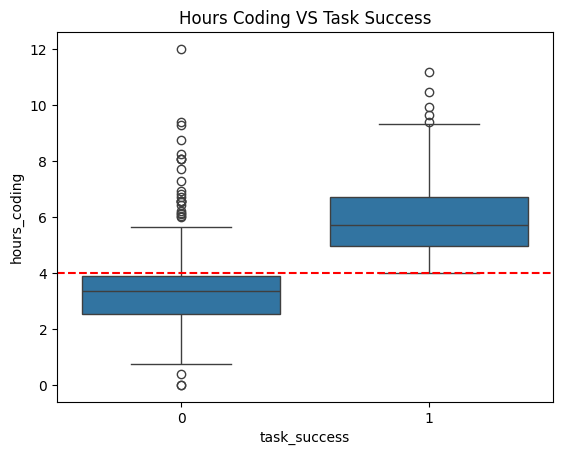

In [166]:
sns.boxplot(x='task_success', y='hours_coding', data=dataset)
plt.title("Hours Coding VS Task Success")
plt.axhline(y=dataset["hours_coding"][dataset["task_success"] == 1].min(), color='r', linestyle='--')


In [167]:
dataset.corr()["hours_coding"]["task_success"]

np.float64(0.6163914996049603)

結論: 具 中度 關聯性

睡眠時長 是否會影響 任務成功 
---
睡眠時長 是否會影響 編成時長
----

Text(0.5, 1.0, 'Sleep Hours VS Task Success')

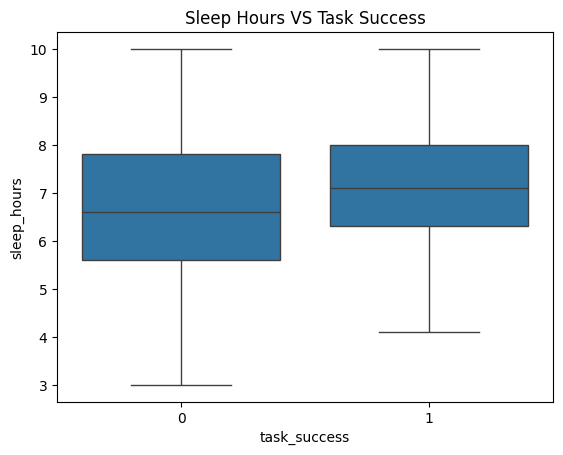

In [168]:
sns.boxplot(x = 'task_success', y = 'sleep_hours', data = dataset_original)
plt.title("Sleep Hours VS Task Success")

In [169]:
sleep_coding = dataset[["sleep_hours" , "hours_coding"]].apply(lambda x: round(x), axis=0 )
sleep_coding 

,sleep_hours,hours_coding
0,6.0,6.0
1,7.0,5.0
2,9.0,6.0
3,6.0,8.0
4,7.0,5.0
...,...,...
495,5.0,6.0
496,7.0,3.0
497,8.0,5.0
498,7.0,3.0


<Axes: xlabel='sleep_hours', ylabel='hours_coding'>

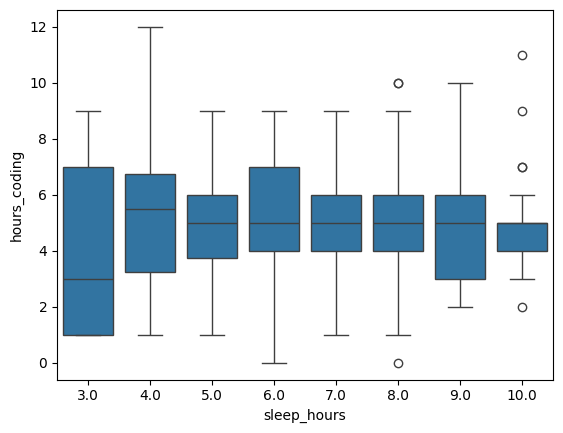

In [170]:
sns.boxplot(x='sleep_hours', y='hours_coding', data=sleep_coding)


In [171]:
dataset.corr()["hours_coding"]["sleep_hours"]

np.float64(-0.02527137316419177)

1.  不影響
2.  負相關
    但，由睡眠時長與編程時長的 盒鬚圖 可知 具有外部影響；

編成時長 中 AI使用時長是否影響 任務成功
---

In [14]:
df = dataset[["hours_coding" , "ai_usage_hours" , "task_success"]].copy()
df.loc[:,["hours_coding" , "ai_usage_hours"]] = df[["hours_coding" , "ai_usage_hours"]].apply(lambda x: round(x*60), axis=0)
df.rename(columns={"hours_coding": "Coding Time (Minutes)", "ai_usage_hours": "AI Usage Time (Minutes)"}, inplace=True)
df

,Coding Time (Minutes),AI Usage Time (Minutes),task_success
0,359.0,43.0,1
1,283.0,105.0,1
2,378.0,136.0,1
3,483.0,84.0,0
4,272.0,76.0,1
...,...,...,...
495,365.0,55.0,1
496,176.0,83.0,0
497,277.0,25.0,1
498,195.0,91.0,0


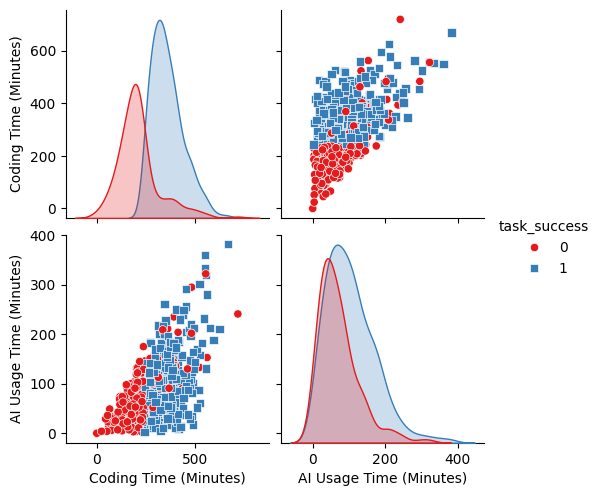

In [173]:
sns.pairplot(df, hue='task_success', markers=["o", "s"], palette="Set1")


In [16]:
df["AI Using rate"] = round(df["AI Usage Time (Minutes)"] / df["Coding Time (Minutes)"]*100)
df["AI Using rate"]

0                12.0
1                37.0
2                36.0
3                17.0
4                28.0
                 ... 
496              47.0
497               9.0
498              47.0
499              47.0
AI Using rate     NaN
Name: AI Using rate, Length: 500, dtype: float64

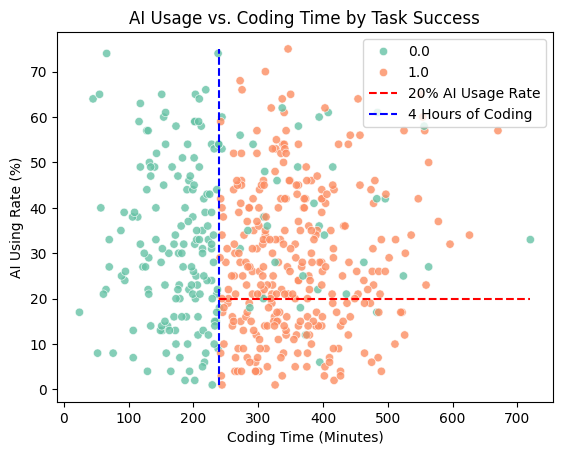

In [17]:
sns.scatterplot(
                x='Coding Time (Minutes)', 
                y='AI Using rate',
                hue='task_success', 
                data=df,
                alpha=0.8,
                palette="Set2",
            )
plt.hlines(
            y=20, 
            xmin=4*60,  # 4 hours in minutes
            xmax=df["Coding Time (Minutes)"].max(),
            color='r', 
            linestyle='--',
            label='20% AI Usage Rate'
        )
plt.vlines(
            x=4*60,  # 4 hours in minutes
            ymin=df["AI Using rate"].min(),
            ymax=df["AI Using rate"].max(),
            color='b', 
            linestyle='--',
            label='4 Hours of Coding'
        )
plt.legend()

plt.title("AI Usage vs. Coding Time by Task Success")
plt.xlabel("Coding Time (Minutes)")
plt.ylabel("AI Using Rate (%)")
plt.show()

結論 : 

       由圖1可知編成時長中，AI使用時長影響任務成功的影響程度低， 亦可知在4小時以上"總"編成時長，任務成功(1)集中於此。

       由圖2可知在 20%的AI使用率 與 4小時以上"總"編成時長，任務成功比率最高

自評壓力等級 是否影響 任務成功
---

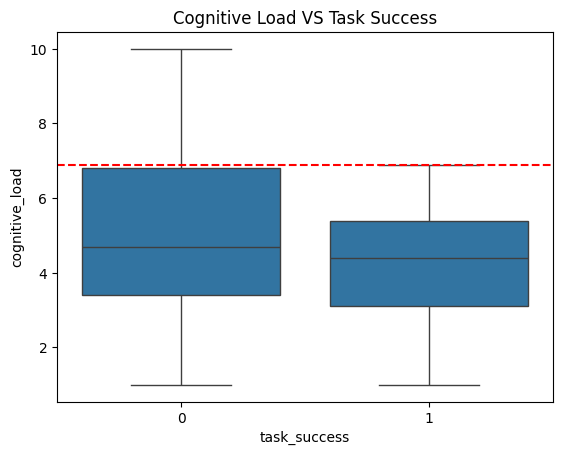

In [18]:
sns.boxplot(x = "task_success", y = "cognitive_load", data = dataset)
plt.title("Cognitive Load VS Task Success")
plt.axhline(
            y=dataset["cognitive_load"][dataset["task_success"] == 1].max(), 
            color='r', 
            linestyle='--'
        )

In [19]:
dataset.corr()["cognitive_load"]["task_success"]

np.float64(-0.20119554128287406)

結論: 負相關 ， 但由圖解釋，在任務成功的樣本中，不存在指數超過7的，與編成時長一樣具有較強的區分力。

commit 是否影響 task_success
---

<Axes: xlabel='task_success', ylabel='commits'>

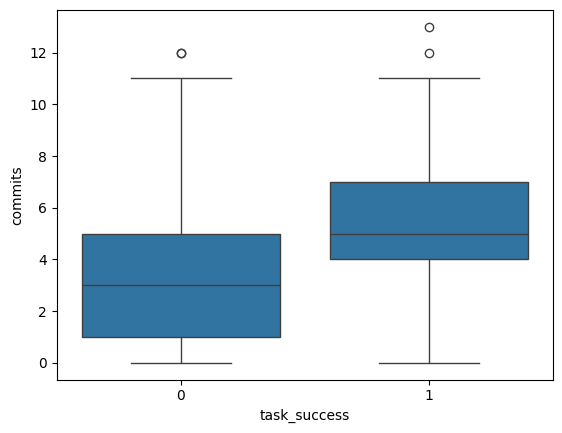

In [20]:
sns.boxplot(x = "task_success", y = "commits", data = dataset)

In [21]:
dataset.corr()["commits"]["task_success"]

np.float64(0.3410441736030683)

結論: 正相關，但不具區分力

# 變數間的關係

In [22]:
dataset.shape

(499, 9)

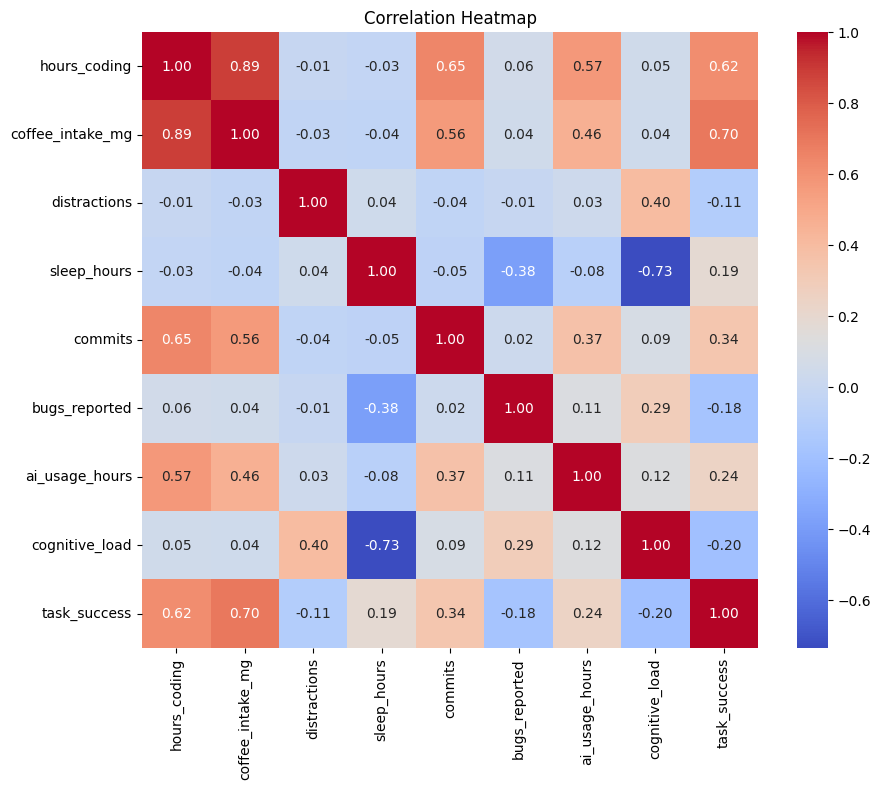

In [23]:
corr = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 生成假設


1. task_success 與 "hours_coding"、"coffee_intake_mg" ， 兩自變量關係度較高，或具有共線性。

2. 可選"hours_coding"、"coffee_intake_mg"，其一作為主要特徵，再加入其餘特徵。

3. cognitive_load 與 hours_coding 具有較強的區分力

總結 : 

1. 可選 cognitive_load 與 hours_coding 做預測
2. AI與人工的調平  總體時長 20% 的使用率
3. 咖啡因攝取量 高度影響 編成時長
4. 高壓力 影響 任務完成 。



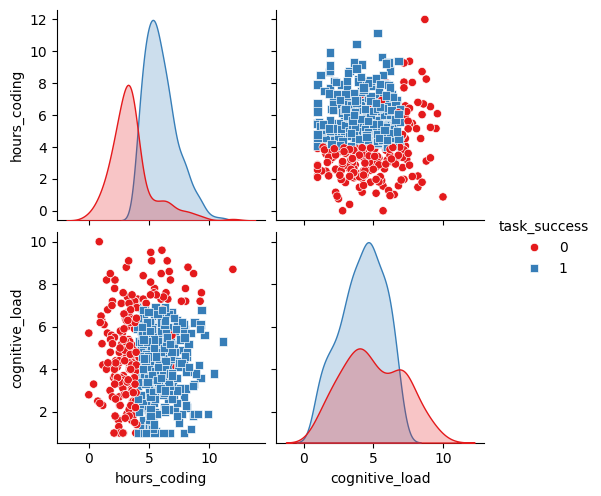

In [24]:
sns.pairplot(data=dataset,
             x_vars=["hours_coding", "cognitive_load"] ,
             y_vars=["hours_coding", "cognitive_load"], 
             hue='task_success', 
             markers=["o", "s"], 
             palette="Set1")

# 模型實作

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

X = dataset[["hours_coding", "cognitive_load"]]
y = dataset["task_success"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

PIPE = make_pipeline(
    RandomForestClassifier(
        n_estimators=150,
        max_depth=None,
        criterion="gini"
    )
)

PIPE.fit(X_train, y_train)

y_pred = PIPE.predict(X_test)
print("Model accuracy on test set:", PIPE.score(X_test, y_test))
print(classification_report(y_test, y_pred))

Model accuracy on test set: 0.99
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.98      1.00      0.99        63

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(PIPE, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.96       0.98       0.98       0.98       0.98       0.98
 1.         0.98       1.         0.97959184]
Mean cross-validation score: 0.9819591836734693
